# Exploring the Baseball Dataset to Predict All Stars

Dataset from [kaggle](https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?resource=download)

This dataset is heavily skewed with many more non All Star players than All Star players. To solve this, we need to down-size the table and discretize the values so we can accurately classify whether a player will be an All Star.

In [4]:
import importlib
import os
import copy
import myutils
import random
importlib.reload(myutils)

import mypytable as mypytable
importlib.reload(mypytable)

import plot_utils
importlib.reload(plot_utils)

# put data into a table
path = os.path.join("output_data", "batting_fielding_joined.txt")
batting_fielding_joined = mypytable.MyPyTable().load_from_file(path)
batting_fielding_joined.drop_column("playerID")
table_copy = copy.deepcopy(batting_fielding_joined.data)

for row in table_copy:
    for i in range(len(row)):
        row[i] = str(row[i])

# separating allstars from non-allstars to make the dataset
rows_of_allstar = []
rows_of_nonallstar = []
for row in table_copy:
    if row[-1] == "true":
        rows_of_allstar.append(row)
    else:
        rows_of_nonallstar.append(row)

# take 524 non-allstars to form even class distribution
random.shuffle(rows_of_nonallstar)
new_non_allstar = []
for i in range(524):
    new_non_allstar.append(rows_of_nonallstar[i])
table_copy = rows_of_allstar + new_non_allstar
random.shuffle(table_copy)

final_table = mypytable.MyPyTable(column_names=batting_fielding_joined.column_names, data=table_copy)
final_table_filename = 'final_table.txt'
final_table_path = os.path.join('output_data', final_table_filename)
final_table.save_to_file(filename=final_table_path)

## Exploring our Working Dataset

First, let's look at the number of players from each year in the dataset.

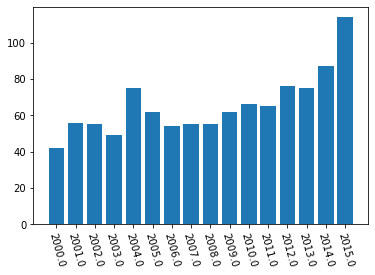

In [17]:
importlib.reload(plot_utils)

# get the number of players from each year
year_column_name = "yearID"
year_column_index = final_table.column_names.index(year_column_name)
players_per_year_dict = dict()
for row in final_table.data:
    player_year = row[year_column_index]
    if players_per_year_dict.get(player_year) is None:
        players_per_year_dict[player_year] = 1
    else:
        players_per_year_dict[player_year] += 1

# sort the data by year
sorted_keys = sorted(list(players_per_year_dict.keys()))
sorted_players_per_year_dict = dict()
for key in sorted_keys:
    sorted_players_per_year_dict[key] = players_per_year_dict[key]

# create a bar chart from the data TODO - label the chart better
plot_utils.plot_bar_chart(x_values=list(sorted_players_per_year_dict.keys()), y_values=list(sorted_players_per_year_dict.values()), 
    x_tick_labels=list(sorted_players_per_year_dict.keys()))

This bar chart shows us that we have slightly more data from recent years. This makes sense because as time progresses, professional athletes' stats are measured more carefully. We will keep this in mind when making predictions, as the predictions will be more accurate for players playing in more recent seasons.

Now, let's take a look at the number of games played for each player in our dataset so we can make sure there is a good spread of players who have played only a few games and players who have played a lot of games. We want more players with a large number of games played so thereare more accurate statistics for them. These values have been discretized already to make this process easier.

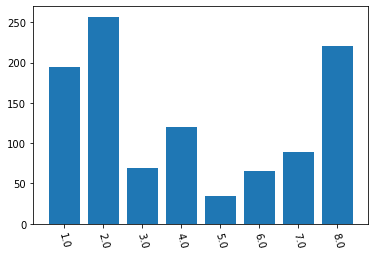

In [21]:
importlib.reload(plot_utils)

# get the number of players with each deiscretized value of games played
games_played_column_name = "G"
games_played_column_index = final_table.column_names.index(games_played_column_name)
players_per_games_played_dict = dict()
for row in final_table.data:
    player_games_played = row[games_played_column_index]
    if players_per_games_played_dict.get(player_games_played) is None:
        players_per_games_played_dict[player_games_played] = 1
    else:
        players_per_games_played_dict[player_games_played] += 1

# sort the data by games played
sorted_keys = sorted(list(players_per_games_played_dict.keys()))
sorted_players_per_games_played_dict = dict()
for key in sorted_keys:
    sorted_players_per_games_played_dict[key] = players_per_games_played_dict[key]

# create a bar chart from the data TODO - label the chart better
plot_utils.plot_bar_chart(x_values=list(sorted_players_per_games_played_dict.keys()), y_values=list(sorted_players_per_games_played_dict.values()), 
    x_tick_labels=list(sorted_players_per_games_played_dict.keys()))

This was not the spread of data we were expecting. Despite this, we do have the large number of players with high games played. On the other hand, there are not many players with an "average" number of games played in our dataset. These two observations tell us that the predictions might not be all that accurate for the average player, however the average player should not be an All Star, so this should not pose too much of an issue.